<a href="https://colab.research.google.com/github/Alexxakiode/Deep-Learning-Project-CartPole-Balancing-within-200-Steps-in-20-Episodes/blob/main/CartPole_Balancing_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartPole Balancing within 200 Steps in 20 Episodes

In [38]:
# # install keras rl2 (we need to install keras-rl2 so it works with the tensorflow 2 version that comes pre-installed with colab)
# !pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 5.5 MB/s eta 0:00:00


In [25]:
# !pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# !pip install gym

In [4]:
# pip install gym[classic_control]

In [5]:
# ! pip install pygame

In [15]:
# Load other basic modules
import matplotlib.pyplot as plt

# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import Adam

import pickle


# Test Random Environment using OpenAI Gym

In [30]:
# code to render the CartPole environment in Colab
!sudo apt-get install -y xvfb ffmpeg
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay

from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay
from IPython.display import clear_output
from time import sleep

# load the gym module
import gym
import random



Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.6).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for mor

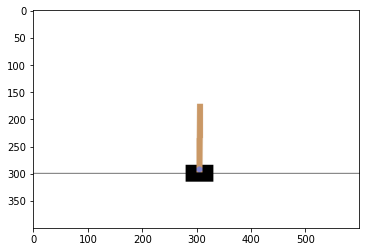

In [61]:
# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

# make the CartPole environment

ENV_NAME = 'CartPole-v0'
# env = gym.make(ENV_NAME, render_mode='human') # update to load the CartPole-v0 environment
env = gym.make(ENV_NAME)
env.reset()
plt.imshow(env.render(mode='rgb_array'))


In [25]:
states = env.observation_space.shape[0]
actions = env.action_space.n

In [18]:
states

4

In [19]:
actions

2

/usr/local/lib/python3.9/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode:1 Score:14.0
Episode:2 Score:14.0
Episode:3 Score:29.0
Episode:4 Score:23.0
Episode:5 Score:22.0
Episode:6 Score:15.0
Episode:7 Score:25.0
Episode:8 Score:32.0
Episode:9 Score:13.0
Episode:10 Score:22.0


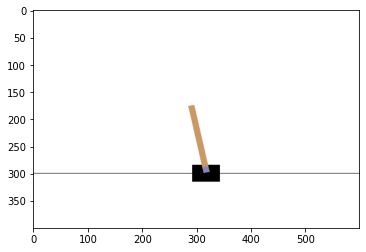

In [62]:
# import pygame


# pygame.init()
# pygame.display.list_modes()
# screen = pygame.display.set_mode((600, 400))

episodes = 10
for episode in range(1, episodes+1):
  state = env.reset()
  done = False
  score = 0

  while not done:
    env.render()
    action = random.choice([0,1])
    n_state, reward, done, info = env.step(action)
    score+=reward
  print('Episode:{} Score:{}'.format (episode, score))


  plt.imshow(env.render(mode='rgb_array'))

## rl2 instead of rl

In [63]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import EpsGreedyQPolicy, LinearAnnealedPolicy  # import the policy
from rl.agents.dqn import DQNAgent      # import the DQN agent


In [64]:
# EpsGreedyQPolicy
# setup experience replay buffer
# here the sequential memory limit is set up the same as the nb_steps (number of steps)
# parameter in the fit method.  This means that all the action-states will fit into the
# memory buffer
# keep window_length as 1. It's used in other RL methods, but keep it to 1 in DQNs
memory = SequentialMemory(limit=10000, window_length=1)

# define the policy (how we select the actions)
policy_inner = EpsGreedyQPolicy()

In [74]:
# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 4)                 0         
                                                                 
 dense_9 (Dense)             (None, 16)                80        
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 690
Trainable params: 690
Non-trainable params: 0
_________________________________________________________________
None


## Run params

# value_max = 1.0

# value_min = 0.05

# nb_steps_warmup=10

# target_model_update=1e-2

nb_steps=10000

lr = 0.001

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   21/10000: episode: 1, duration: 2.952s, episode steps:  21, steps per second:   7, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: 8.694328, mae: 33.710423, mean_q: 73.435162, mean_eps: 0.998527
   72/10000: episode: 2, duration: 0.421s, episode steps:  51, steps per second: 121, episode reward: 51.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.490 [0.000, 1.000],  loss: 6.412590, mae: 33.805395, mean_q: 72.680757, mean_eps: 0.995630
   92/10000: episode: 3, duration: 0.180s, episode steps:  20, steps per second: 111, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.300 [0.000, 1.000],  loss: 11.129038, mae: 32.887500, mean_q: 71.156071, mean_eps: 0.992257
  124/10000: episode: 4, duration: 0.274s, episode steps:  32, steps per second: 117, episode reward: 32.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.344 [0.000, 1.000],  loss: 11.307388, mae: 34.190550, mean_q: 73.333019, m

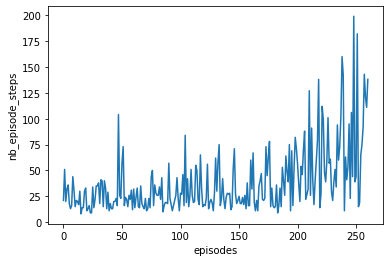

Testing for 20 episodes ...
Episode 1: reward: 174.000, steps: 174
Episode 2: reward: 178.000, steps: 178
Episode 3: reward: 187.000, steps: 187
Episode 4: reward: 173.000, steps: 173
Episode 5: reward: 172.000, steps: 172
Episode 6: reward: 191.000, steps: 191
Episode 7: reward: 177.000, steps: 177
Episode 8: reward: 177.000, steps: 177
Episode 9: reward: 173.000, steps: 173
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 162.000, steps: 162
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 186.000, steps: 186
Episode 14: reward: 157.000, steps: 157
Episode 15: reward: 158.000, steps: 158
Episode 16: reward: 152.000, steps: 152
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 172.000, steps: 172
Episode 19: reward: 175.000, steps: 175
Episode 20: reward: 177.000, steps: 177


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


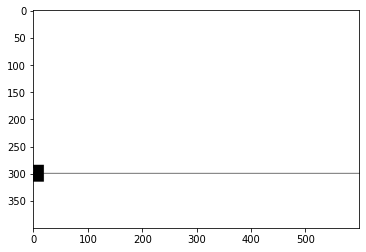

In [76]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.05, 
                               value_test=.05,
                               nb_steps=10000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.001), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

# Q-Network with 2 hidden layer

In [72]:
# # Q-Network
# model = Sequential()
# model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
# model.add(Flatten())
# # add extra layers here
# model.add(Dense(16, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
# print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 16)                80        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 690
Trainable params: 690
Non-trainable params: 0
_________________________________________________________________
None


## Run params

# value_max = 1.0

# value_min = 0.01

# nb_steps_warmup=10

# target_model_update=1e-2

nb_steps=10000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   17/10000: episode: 1, duration: 2.419s, episode steps:  17, steps per second:   7, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.706 [0.000, 1.000],  loss: 0.261790, mae: 0.603373, mean_q: 0.571284, mean_eps: 0.998664
   51/10000: episode: 2, duration: 0.271s, episode steps:  34, steps per second: 125, episode reward: 34.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.382 [0.000, 1.000],  loss: 0.029714, mae: 0.764287, mean_q: 1.433137, mean_eps: 0.996683
   62/10000: episode: 3, duration: 0.088s, episode steps:  11, steps per second: 125, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.636 [0.000, 1.000],  loss: 0.012866, mae: 0.827941, mean_q: 1.627244, mean_eps: 0.994456
   88/10000: episode: 4, duration: 0.215s, episode steps:  26, steps per second: 121, episode reward: 26.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 0.008441, mae: 0.904307, mean_q: 1.811396, mean_eps: 0

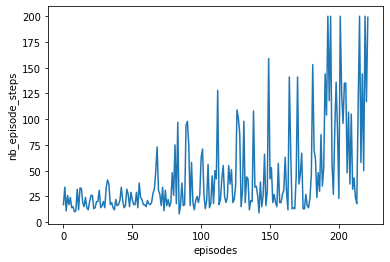

Testing for 20 episodes ...
Episode 1: reward: 118.000, steps: 118
Episode 2: reward: 113.000, steps: 113
Episode 3: reward: 118.000, steps: 118
Episode 4: reward: 108.000, steps: 108
Episode 5: reward: 100.000, steps: 100
Episode 6: reward: 118.000, steps: 118
Episode 7: reward: 127.000, steps: 127
Episode 8: reward: 112.000, steps: 112
Episode 9: reward: 108.000, steps: 108
Episode 10: reward: 95.000, steps: 95
Episode 11: reward: 105.000, steps: 105
Episode 12: reward: 119.000, steps: 119
Episode 13: reward: 112.000, steps: 112
Episode 14: reward: 102.000, steps: 102
Episode 15: reward: 153.000, steps: 153
Episode 16: reward: 103.000, steps: 103
Episode 17: reward: 114.000, steps: 114
Episode 18: reward: 101.000, steps: 101
Episode 19: reward: 102.000, steps: 102
Episode 20: reward: 141.000, steps: 141


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


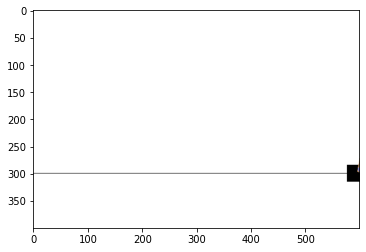

In [73]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.01, 
                               value_test=.05,
                               nb_steps=10000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

# Q-Network with 1 hidden layer

## Run params

# value_max = 1.0

# value_min = 0.05

#value_test = 0.05

# nb_steps_warmup=10

# target_model_update=1e-2

nb_steps=50000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 50000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    25/50000: episode: 1, duration: 4.103s, episode steps:  25, steps per second:   6, episode reward: 25.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.480 [0.000, 1.000],  loss: 5.628445, mae: 47.717283, mean_q: 94.405688, mean_eps: 0.999668
    42/50000: episode: 2, duration: 0.157s, episode steps:  17, steps per second: 108, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.471 [0.000, 1.000],  loss: 12.853311, mae: 48.908703, mean_q: 97.327906, mean_eps: 0.999373
    60/50000: episode: 3, duration: 0.159s, episode steps:  18, steps per second: 113, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.444 [0.000, 1.000],  loss: 2.043817, mae: 47.343117, mean_q: 94.346959, mean_eps: 0.999040
    79/50000: episode: 4, duration: 0.169s, episode steps:  19, steps per second: 113, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.421 [0.000, 1.000],  loss: 7.855423, mae: 46.523631, mean_q: 92.563156

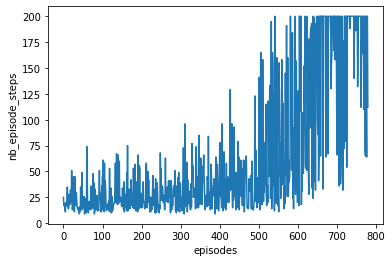

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


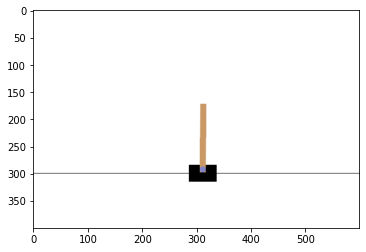

In [82]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.05, 
                               value_test=0.05,
                               nb_steps=50000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   35/10000: episode: 1, duration: 3.230s, episode steps:  35, steps per second:  11, episode reward: 35.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.514 [0.000, 1.000],  loss: 0.579747, mae: 0.652844, mean_q: 0.297383, mean_eps: 0.997863
   57/10000: episode: 2, duration: 0.176s, episode steps:  22, steps per second: 125, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.636 [0.000, 1.000],  loss: 0.473724, mae: 0.648804, mean_q: 0.430338, mean_eps: 0.995677
   75/10000: episode: 3, duration: 0.149s, episode steps:  18, steps per second: 121, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.389 [0.000, 1.000],  loss: 0.410939, mae: 0.667866, mean_q: 0.559406, mean_eps: 0.993777
  108/10000: episode: 4, duration: 0.263s, episode steps:  33, steps per second: 125, episode reward: 33.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.576 [0.000, 1.000],  loss: 0.362695, mae: 0.677788, mean_q: 0.669186, mean_eps: 0

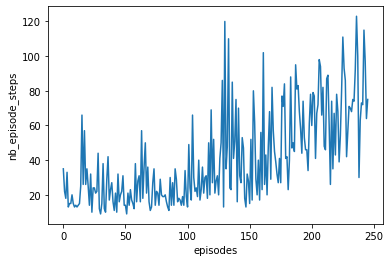

Testing for 20 episodes ...
Episode 1: reward: 94.000, steps: 94
Episode 2: reward: 82.000, steps: 82
Episode 3: reward: 90.000, steps: 90
Episode 4: reward: 80.000, steps: 80
Episode 5: reward: 85.000, steps: 85
Episode 6: reward: 88.000, steps: 88
Episode 7: reward: 83.000, steps: 83
Episode 8: reward: 96.000, steps: 96
Episode 9: reward: 93.000, steps: 93
Episode 10: reward: 79.000, steps: 79
Episode 11: reward: 92.000, steps: 92
Episode 12: reward: 79.000, steps: 79
Episode 13: reward: 86.000, steps: 86
Episode 14: reward: 78.000, steps: 78
Episode 15: reward: 73.000, steps: 73
Episode 16: reward: 83.000, steps: 83
Episode 17: reward: 88.000, steps: 88
Episode 18: reward: 96.000, steps: 96
Episode 19: reward: 86.000, steps: 86
Episode 20: reward: 94.000, steps: 94


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


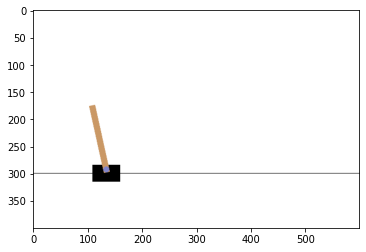

In [78]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.05, 
                               value_test=.05,
                               nb_steps=10000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.001), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

In [65]:
# # Q-Network
# model = Sequential()
# model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
# model.add(Flatten())
# # add extra layers here
# model.add(Dense(16, activation='relu'))
# model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
# print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 16)                80        
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


## Run params

# value_max = 1.0

# value_min = 0.05

#value_test = 0.05

# nb_steps_warmup=10

# target_model_update=1e-2

nb_steps=50000

lr = 0.01

nb_episodes=5

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 50000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    46/50000: episode: 1, duration: 4.608s, episode steps:  46, steps per second:  10, episode reward: 46.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.478 [0.000, 1.000],  loss: 27.383996, mae: 72.990434, mean_q: 146.653826, mean_eps: 0.999468
    82/50000: episode: 2, duration: 0.335s, episode steps:  36, steps per second: 107, episode reward: 36.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.444 [0.000, 1.000],  loss: 74.980317, mae: 73.636779, mean_q: 146.523461, mean_eps: 0.998794
    97/50000: episode: 3, duration: 0.138s, episode steps:  15, steps per second: 109, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 67.980470, mae: 73.921759, mean_q: 148.205053, mean_eps: 0.998309
   112/50000: episode: 4, duration: 0.138s, episode steps:  15, steps per second: 109, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 35.495042, mae: 72.311088, mean_q: 145

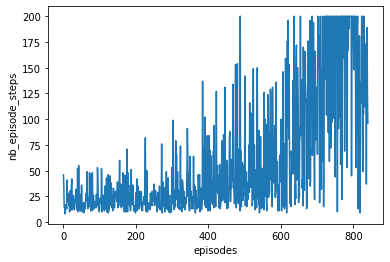

Testing for 5 episodes ...
Episode 1: reward: 129.000, steps: 129
Episode 2: reward: 135.000, steps: 135
Episode 3: reward: 130.000, steps: 130
Episode 4: reward: 129.000, steps: 129
Episode 5: reward: 129.000, steps: 129


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


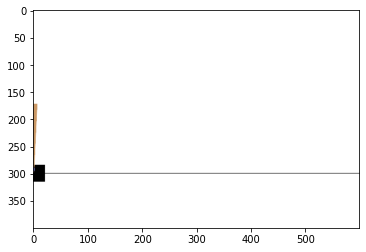

In [83]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.05, 
                               value_test=0.05,
                               nb_steps=50000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=5, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

## Run params

# value_max = 0.5

# value_min = 0.01

#value_test = 0.05

# nb_steps_warmup=10

# target_model_update=1e-2

nb_steps=50000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 50000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   170/50000: episode: 1, duration: 5.575s, episode steps: 170, steps per second:  30, episode reward: 170.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.512 [0.000, 1.000],  loss: 9.751393, mae: 27.911642, mean_q: 55.224113, mean_eps: 0.499118
   210/50000: episode: 2, duration: 0.361s, episode steps:  40, steps per second: 111, episode reward: 40.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 9.683141, mae: 28.165603, mean_q: 55.739946, mean_eps: 0.498143
   406/50000: episode: 3, duration: 2.176s, episode steps: 196, steps per second:  90, episode reward: 196.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.469 [0.000, 1.000],  loss: 11.227803, mae: 28.335392, mean_q: 56.093776, mean_eps: 0.496986
   606/50000: episode: 4, duration: 2.032s, episode steps: 200, steps per second:  98, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 11.038761, mae: 28.896393, mean_q: 57.49

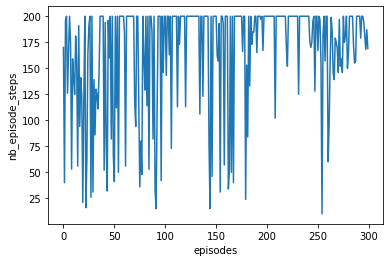

Testing for 20 episodes ...
Episode 1: reward: 157.000, steps: 157
Episode 2: reward: 162.000, steps: 162
Episode 3: reward: 159.000, steps: 159
Episode 4: reward: 153.000, steps: 153
Episode 5: reward: 153.000, steps: 153
Episode 6: reward: 170.000, steps: 170
Episode 7: reward: 158.000, steps: 158
Episode 8: reward: 158.000, steps: 158
Episode 9: reward: 154.000, steps: 154
Episode 10: reward: 160.000, steps: 160
Episode 11: reward: 162.000, steps: 162
Episode 12: reward: 167.000, steps: 167
Episode 13: reward: 163.000, steps: 163
Episode 14: reward: 165.000, steps: 165
Episode 15: reward: 165.000, steps: 165
Episode 16: reward: 163.000, steps: 163
Episode 17: reward: 174.000, steps: 174
Episode 18: reward: 166.000, steps: 166
Episode 19: reward: 172.000, steps: 172
Episode 20: reward: 173.000, steps: 173


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


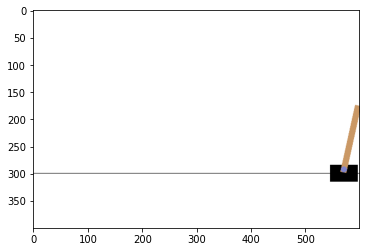

In [81]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='eps',            
                               value_max=0.5,
                               value_min=0.01, 
                               value_test=0.05,
                               nb_steps=50000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

## Run params

# value_max = 0.5

# value_min = 0.01

#value_test = 0.05

# nb_steps_warmup=10

# target_model_update=1e-4

nb_steps=10000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   18/10000: episode: 1, duration: 3.697s, episode steps:  18, steps per second:   5, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.444 [0.000, 1.000],  loss: 1.284858, mae: 18.656778, mean_q: 37.301461, mean_eps: 0.499314
   82/10000: episode: 2, duration: 0.540s, episode steps:  64, steps per second: 119, episode reward: 64.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 1.504567, mae: 19.238596, mean_q: 38.555629, mean_eps: 0.497574
  164/10000: episode: 3, duration: 0.676s, episode steps:  82, steps per second: 121, episode reward: 82.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 1.062835, mae: 19.268979, mean_q: 38.566923, mean_eps: 0.493997
  324/10000: episode: 4, duration: 1.339s, episode steps: 160, steps per second: 119, episode reward: 160.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.512 [0.000, 1.000],  loss: 1.986157, mae: 19.352337, mean_q: 38.639301, me

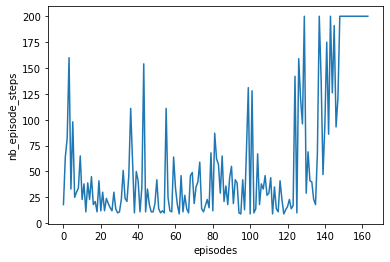

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 179.000, steps: 179
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 189.000, steps: 189
Episode 7: reward: 199.000, steps: 199
Episode 8: reward: 196.000, steps: 196
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 197.000, steps: 197
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 188.000, steps: 188
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 186.000, steps: 186
Episode 18: reward: 188.000, steps: 188
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 195.000, steps: 195


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


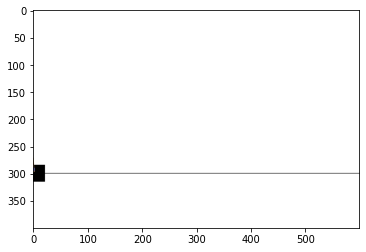

In [80]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='eps',            
                               value_max=0.5,
                               value_min=0.01, 
                               value_test=0.05,
                               nb_steps=10000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-4, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

## Run params

# value_max = 0.5

# value_min = 0.01

#value_test = 0.01

# nb_steps_warmup=10

# target_model_update=1e-3

nb_steps=10000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   17/10000: episode: 1, duration: 3.429s, episode steps:  17, steps per second:   5, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.588 [0.000, 1.000],  loss: 14.927475, mae: 18.110921, mean_q: 34.485975, mean_eps: 0.499339
   46/10000: episode: 2, duration: 0.352s, episode steps:  29, steps per second:  82, episode reward: 29.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.448 [0.000, 1.000],  loss: 9.331665, mae: 18.212118, mean_q: 35.537562, mean_eps: 0.498481
   89/10000: episode: 3, duration: 0.507s, episode steps:  43, steps per second:  85, episode reward: 43.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.442 [0.000, 1.000],  loss: 8.382703, mae: 18.073512, mean_q: 35.352976, mean_eps: 0.496717
  130/10000: episode: 4, duration: 0.493s, episode steps:  41, steps per second:  83, episode reward: 41.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.463 [0.000, 1.000],  loss: 6.123927, mae: 18.139156, mean_q: 35.488250, me

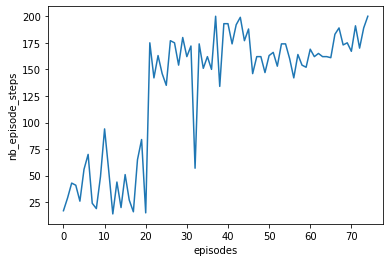

Testing for 20 episodes ...
Episode 1: reward: 115.000, steps: 115
Episode 2: reward: 106.000, steps: 106
Episode 3: reward: 109.000, steps: 109
Episode 4: reward: 105.000, steps: 105
Episode 5: reward: 113.000, steps: 113
Episode 6: reward: 110.000, steps: 110
Episode 7: reward: 108.000, steps: 108
Episode 8: reward: 113.000, steps: 113
Episode 9: reward: 110.000, steps: 110
Episode 10: reward: 106.000, steps: 106
Episode 11: reward: 111.000, steps: 111
Episode 12: reward: 111.000, steps: 111
Episode 13: reward: 110.000, steps: 110
Episode 14: reward: 107.000, steps: 107
Episode 15: reward: 113.000, steps: 113
Episode 16: reward: 114.000, steps: 114
Episode 17: reward: 111.000, steps: 111
Episode 18: reward: 114.000, steps: 114
Episode 19: reward: 106.000, steps: 106
Episode 20: reward: 108.000, steps: 108


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


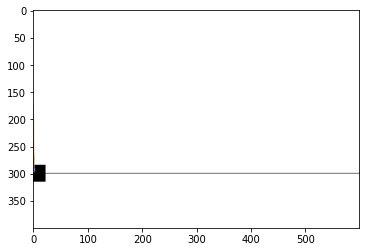

In [79]:
# policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
#                                attr='eps',            
#                                value_max=0.5,
#                                value_min=0.01, 
#                                value_test=0.01,
#                                nb_steps=10000)

# # define the agent
# dqn = DQNAgent(model=model, 
#                nb_actions=env.action_space.n,
#                memory=memory,
#                nb_steps_warmup=10,
#                target_model_update=1e-3, 
#                policy=policy_outer) 

# dqn.compile(Adam(lr=0.01), metrics=['mae'])

# history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# # summarize the history for number  of episode steps
# plt.plot(history.history['nb_episode_steps'])
# plt.ylabel('nb_episode_steps')
# plt.xlabel('episodes')
# plt.show()

# dqn.test(env, nb_episodes=20, visualize=False)

# plt.imshow(env.render(mode='rgb_array'))

## Run params

# value_max = 0.5

# value_min = 0.01

#value_test = 0.05

# nb_steps_warmup=10

# target_model_update=1e-3

nb_steps=10000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   78/10000: episode: 1, duration: 2.580s, episode steps:  78, steps per second:  30, episode reward: 78.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.436 [0.000, 1.000],  loss: 6.250701, mae: 38.393078, mean_q: 77.922952, mean_eps: 0.497844
   98/10000: episode: 2, duration: 0.162s, episode steps:  20, steps per second: 124, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.550 [0.000, 1.000],  loss: 15.884942, mae: 38.455485, mean_q: 77.717164, mean_eps: 0.495712
  110/10000: episode: 3, duration: 0.097s, episode steps:  12, steps per second: 123, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: 5.063988, mae: 37.876823, mean_q: 77.795512, mean_eps: 0.494929
  129/10000: episode: 4, duration: 0.152s, episode steps:  19, steps per second: 125, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.579 [0.000, 1.000],  loss: 6.072230, mae: 38.375618, mean_q: 79.107656, me

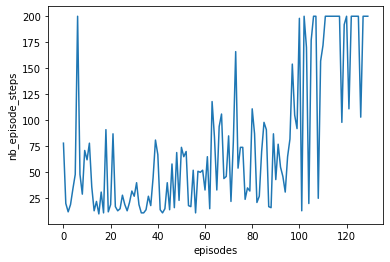

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


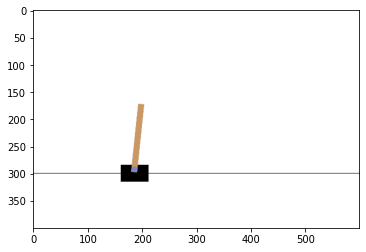

In [71]:
# policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
#                                attr='eps',            
#                                value_max=0.5,
#                                value_min=0.01, 
#                                value_test=.05,
#                                nb_steps=10000)

# # define the agent
# dqn = DQNAgent(model=model, 
#                nb_actions=env.action_space.n,
#                memory=memory,
#                nb_steps_warmup=10,
#                target_model_update=1e-3, 
#                policy=policy_outer) 

# dqn.compile(Adam(lr=0.01), metrics=['mae'])

# history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# # summarize the history for number  of episode steps
# plt.plot(history.history['nb_episode_steps'])
# plt.ylabel('nb_episode_steps')
# plt.xlabel('episodes')
# plt.show()

# dqn.test(env, nb_episodes=20, visualize=False)

# plt.imshow(env.render(mode='rgb_array'))

## Run params

# value_max = 0.5

# value_min = 0.01

# nb_steps_warmup=10

target_model_update=1e-2

nb_steps=10000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   80/10000: episode: 1, duration: 2.426s, episode steps:  80, steps per second:  33, episode reward: 80.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.463 [0.000, 1.000],  loss: 14.868063, mae: 45.011163, mean_q: 88.189117, mean_eps: 0.497795
  105/10000: episode: 2, duration: 0.181s, episode steps:  25, steps per second: 138, episode reward: 25.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.560 [0.000, 1.000],  loss: 11.367138, mae: 45.874433, mean_q: 90.632608, mean_eps: 0.495492
  209/10000: episode: 3, duration: 0.770s, episode steps: 104, steps per second: 135, episode reward: 104.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.490 [0.000, 1.000],  loss: 15.625989, mae: 44.978964, mean_q: 88.565751, mean_eps: 0.492332
  333/10000: episode: 4, duration: 0.931s, episode steps: 124, steps per second: 133, episode reward: 124.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.484 [0.000, 1.000],  loss: 8.374608, mae: 44.847735, mean_q: 88.544559

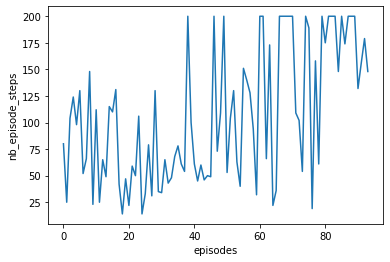

Testing for 20 episodes ...
Episode 1: reward: 138.000, steps: 138
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 152.000, steps: 152
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 134.000, steps: 134
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


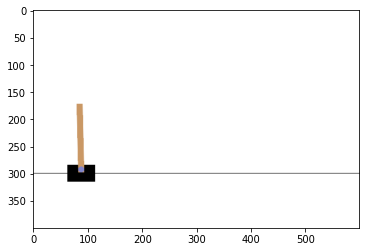

In [70]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='eps',            
                               value_max=0.5,
                               value_min=0.01, 
                               value_test=.05,
                               nb_steps=10000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

## Run params

# value_max = 0.1

# value_min = 0.01

# nb_steps_warmup=10

target_model_update=1e-2

nb_steps=10000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  200/10000: episode: 1, duration: 3.000s, episode steps: 200, steps per second:  67, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 31.443744, mae: 69.685269, mean_q: 140.623246, mean_eps: 0.099055
  400/10000: episode: 2, duration: 1.426s, episode steps: 200, steps per second: 140, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.510 [0.000, 1.000],  loss: 38.006421, mae: 69.432146, mean_q: 139.975963, mean_eps: 0.097305
  600/10000: episode: 3, duration: 1.424s, episode steps: 200, steps per second: 140, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 39.106716, mae: 69.309552, mean_q: 139.371017, mean_eps: 0.095504
  800/10000: episode: 4, duration: 1.419s, episode steps: 200, steps per second: 141, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.505 [0.000, 1.000],  loss: 32.530695, mae: 69.006197, mean_q: 139

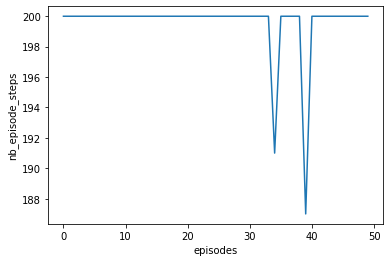

Testing for 20 episodes ...
Episode 1: reward: 126.000, steps: 126
Episode 2: reward: 128.000, steps: 128
Episode 3: reward: 127.000, steps: 127
Episode 4: reward: 126.000, steps: 126
Episode 5: reward: 129.000, steps: 129
Episode 6: reward: 130.000, steps: 130
Episode 7: reward: 132.000, steps: 132
Episode 8: reward: 132.000, steps: 132
Episode 9: reward: 122.000, steps: 122
Episode 10: reward: 130.000, steps: 130
Episode 11: reward: 124.000, steps: 124
Episode 12: reward: 131.000, steps: 131
Episode 13: reward: 124.000, steps: 124
Episode 14: reward: 125.000, steps: 125
Episode 15: reward: 128.000, steps: 128
Episode 16: reward: 129.000, steps: 129
Episode 17: reward: 124.000, steps: 124
Episode 18: reward: 129.000, steps: 129
Episode 19: reward: 121.000, steps: 121
Episode 20: reward: 131.000, steps: 131


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


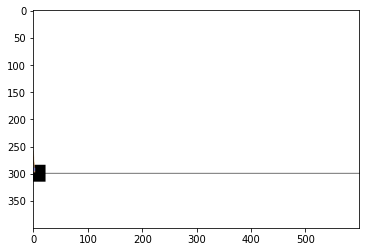

In [69]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='eps',            
                               value_max=0.1,
                               value_min=0.01, 
                               value_test=.05,
                               nb_steps=10000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

## Run params

value_max = 1.0

value_min = 0.01

value_test = 0.05

nb_steps_warmup=10

target_model_update=1e-2

nb_steps=10000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   44/10000: episode: 1, duration: 1.836s, episode steps:  44, steps per second:  24, episode reward: 44.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.545 [0.000, 1.000],  loss: 28.044643, mae: 57.917590, mean_q: 118.237616, mean_eps: 0.997327
   65/10000: episode: 2, duration: 0.160s, episode steps:  21, steps per second: 131, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.619 [0.000, 1.000],  loss: 34.251764, mae: 57.166277, mean_q: 116.348490, mean_eps: 0.994654
   75/10000: episode: 3, duration: 0.082s, episode steps:  10, steps per second: 122, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.700 [0.000, 1.000],  loss: 16.625178, mae: 59.078951, mean_q: 120.242591, mean_eps: 0.993119
  100/10000: episode: 4, duration: 0.204s, episode steps:  25, steps per second: 123, episode reward: 25.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 22.496757, mae: 57.331595, mean_q: 117.131

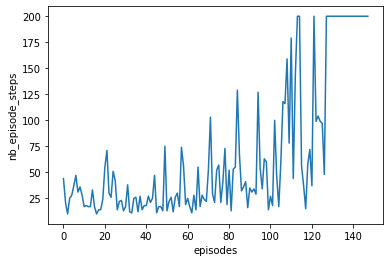

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


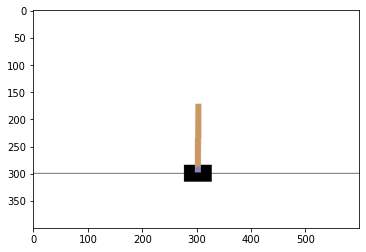

In [68]:
policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
                               attr='eps',            
                               value_max=1.0,
                               value_min=0.01, 
                               value_test=.05,
                               nb_steps=10000)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, 
               policy=policy_outer) 

dqn.compile(Adam(lr=0.01), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

plt.imshow(env.render(mode='rgb_array'))

## Run params

# value_min = 0.5

# nb_steps_warmup=10

target_model_update=1e-2

nb_steps=10000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   23/10000: episode: 1, duration: 1.600s, episode steps:  23, steps per second:  14, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.435 [0.000, 1.000],  loss: 3.070644, mae: 40.777772, mean_q: 82.875738, mean_eps: 0.999175
   42/10000: episode: 2, duration: 0.133s, episode steps:  19, steps per second: 143, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.421 [0.000, 1.000],  loss: 13.965445, mae: 39.990881, mean_q: 80.896786, mean_eps: 0.998400
   59/10000: episode: 3, duration: 0.126s, episode steps:  17, steps per second: 135, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.471 [0.000, 1.000],  loss: 3.978817, mae: 40.397267, mean_q: 82.217898, mean_eps: 0.997500
   82/10000: episode: 4, duration: 0.158s, episode steps:  23, steps per second: 145, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.391 [0.000, 1.000],  loss: 17.077926, mae: 40.339962, mean_q: 81.372750, m

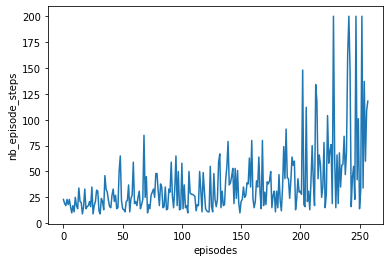

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 177.000, steps: 177
Episode 4: reward: 183.000, steps: 183
Episode 5: reward: 186.000, steps: 186
Episode 6: reward: 179.000, steps: 179
Episode 7: reward: 175.000, steps: 175
Episode 8: reward: 190.000, steps: 190
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 185.000, steps: 185
Episode 11: reward: 188.000, steps: 188
Episode 12: reward: 186.000, steps: 186
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 180.000, steps: 180
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 180.000, steps: 180
Episode 17: reward: 173.000, steps: 173
Episode 18: reward: 185.000, steps: 185
Episode 19: reward: 175.000, steps: 175
Episode 20: reward: 168.000, steps: 168


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


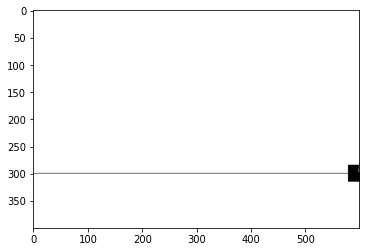

In [67]:
# policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
#                                attr='eps',            
#                                value_max=1.0,
#                                value_min=0.5, 
#                                value_test=.05,
#                                nb_steps=10000)

# # define the agent
# dqn = DQNAgent(model=model, 
#                nb_actions=env.action_space.n,
#                memory=memory,
#                nb_steps_warmup=10,
#                target_model_update=1e-2, 
#                policy=policy_outer) 

# dqn.compile(Adam(lr=0.01), metrics=['mae'])

# history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# # summarize the history for number  of episode steps
# plt.plot(history.history['nb_episode_steps'])
# plt.ylabel('nb_episode_steps')
# plt.xlabel('episodes')
# plt.show()

# dqn.test(env, nb_episodes=20, visualize=False)

# plt.imshow(env.render(mode='rgb_array'))

## Run params

# value_min = 0.1

# nb_steps_warmup=10

target_model_update=1e-2

nb_steps=10000

lr = 0.01

nb_episodes=20

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.9/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)

   16/10000: episode: 1, duration: 1.171s, episode steps:  16, steps per second:  14, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.625 [0.000, 1.000],  loss: 0.800655, mae: 0.704553, mean_q: 0.219762, mean_eps: 0.998830
   30/10000: episode: 2, duration: 0.106s, episode steps:  14, steps per second: 133, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 0.443065, mae: 0.682525, mean_q: 0.679667, mean_eps: 0.997975
   53/10000: episode: 3, duration: 0.162s, episode steps:  23, steps per second: 142, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.304 [0.000, 1.000],  loss: 0.099335, mae: 0.741548, mean_q: 1.213493, mean_eps: 0.996310
   68/10000: episode: 4, duration: 0.113s, episode steps:  15, steps per second: 132, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.267 [0.000, 1.000],  loss: 0.064469, mae: 0.828117, mean_q: 1.535144, mean_eps: 0

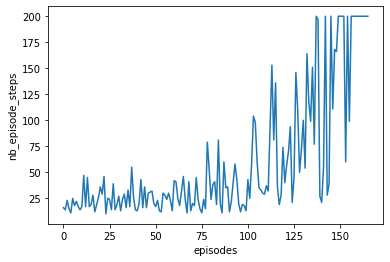

Testing for 20 episodes ...
Episode 1: reward: 172.000, steps: 172
Episode 2: reward: 198.000, steps: 198
Episode 3: reward: 188.000, steps: 188
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 177.000, steps: 177
Episode 6: reward: 173.000, steps: 173
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 194.000, steps: 194
Episode 9: reward: 199.000, steps: 199
Episode 10: reward: 180.000, steps: 180
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 187.000, steps: 187
Episode 13: reward: 175.000, steps: 175
Episode 14: reward: 183.000, steps: 183
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 177.000, steps: 177
Episode 19: reward: 190.000, steps: 190
Episode 20: reward: 200.000, steps: 200


/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


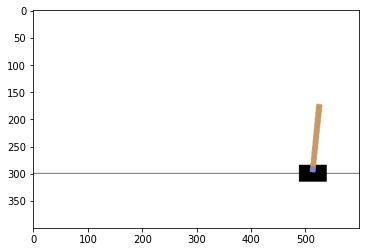

In [66]:
# policy_outer =  LinearAnnealedPolicy(inner_policy=policy_inner, 
#                                attr='eps',            
#                                value_max=1.0,
#                                value_min=0.1, 
#                                value_test=.05,
#                                nb_steps=10000)

# # define the agent
# dqn = DQNAgent(model=model, 
#                nb_actions=env.action_space.n,
#                memory=memory,
#                nb_steps_warmup=10,
#                target_model_update=1e-2, 
#                policy=policy_outer) 

# dqn.compile(Adam(lr=0.01), metrics=['mae'])

# history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# # summarize the history for number  of episode steps
# plt.plot(history.history['nb_episode_steps'])
# plt.ylabel('nb_episode_steps')
# plt.xlabel('episodes')
# plt.show()

# dqn.test(env, nb_episodes=20, visualize=False)

# plt.imshow(env.render(mode='rgb_array'))

In [46]:
dqn.test(env, nb_episodes=20, visualize=True)

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [ ]:
env = gym.make(ENV_NAME, render_mode='human')
plt.imshow(env.render(mode='rgb_array', disable_render_order_enforcing=True))

